In [1]:
import pandas as pd
import os

In [2]:
folder = os.path.join('halfhourly_dataset')

The next files have one column of time 'tstp' and the other columns are the blocks. Each block represent a group of households.

In [22]:
sum_df = pd.read_csv(os.path.join(folder, 'sum_resume.csv'))
max_df = pd.read_csv(os.path.join(folder, 'max_resume.csv'))
min_df = pd.read_csv(os.path.join(folder, 'min_resume.csv'))
mean_df = pd.read_csv(os.path.join(folder, 'mean_resume.csv'))

In [23]:
min_df.columns # lets analyse just the file with the means

Index(['tstp', 'block_0', 'block_1', 'block_10', 'block_100', 'block_101',
       'block_102', 'block_103', 'block_104', 'block_105',
       ...
       'block_90', 'block_91', 'block_92', 'block_93', 'block_94', 'block_95',
       'block_96', 'block_97', 'block_98', 'block_99'],
      dtype='object', length=113)

In [24]:
min_df['tstp'].count() # maximum number of rows (dates)

39292

In [25]:
min_df['tstp'].min(), min_df['tstp'].max() # initial and final date

('2011-12-03 09:00:00', '2014-02-28 00:00:00')

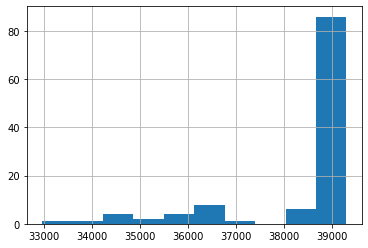

In [26]:
min_df.count().hist() # it shows the number of points by block

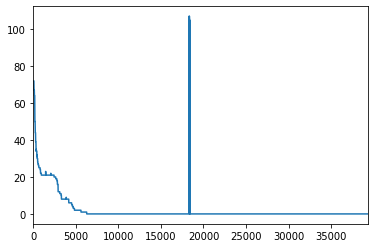

In [42]:
min_df.isna().sum(axis=1).plot() # shows the amount of null values in time

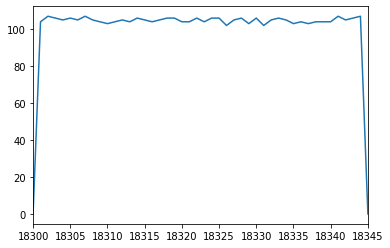

In [58]:
min_df.loc[(min_df['tstp'] >= '2012-12-18 15:00:00') & (min_df['tstp'] <= '2012-12-18 15:30:00'),:].isna().sum(axis=1).plot()

In [60]:
min_df.loc[(min_df['tstp'] > '2012-12-18 15:00:00') & (min_df['tstp'] < '2012-12-18 15:30:00'),'tstp']

18301    2012-12-18 15:13:37
18302    2012-12-18 15:15:25
18303    2012-12-18 15:15:30
18304    2012-12-18 15:15:38
18305    2012-12-18 15:16:28
18306    2012-12-18 15:18:11
18307    2012-12-18 15:19:39
18308    2012-12-18 15:20:02
18309    2012-12-18 15:20:11
18310    2012-12-18 15:22:16
18311    2012-12-18 15:23:00
18312    2012-12-18 15:23:02
18313    2012-12-18 15:23:03
18314    2012-12-18 15:23:08
18315    2012-12-18 15:23:11
18316    2012-12-18 15:23:21
18317    2012-12-18 15:23:22
18318    2012-12-18 15:23:23
18319    2012-12-18 15:23:26
18320    2012-12-18 15:23:29
18321    2012-12-18 15:23:31
18322    2012-12-18 15:23:33
18323    2012-12-18 15:23:42
18324    2012-12-18 15:23:43
18325    2012-12-18 15:23:44
18326    2012-12-18 15:23:45
18327    2012-12-18 15:23:47
18328    2012-12-18 15:23:49
18329    2012-12-18 15:23:53
18330    2012-12-18 15:23:54
18331    2012-12-18 15:23:55
18332    2012-12-18 15:23:57
18333    2012-12-18 15:24:01
18334    2012-12-18 15:24:03
18335    2012-

Between the 15:00 and 15:30 hrs of 2012.12.18 there are weird values in the time, given we want 30 minutes resolution, I will delete them.

In [61]:
indexes = min_df.loc[(min_df['tstp'] > '2012-12-18 15:00:00') & (min_df['tstp'] < '2012-12-18 15:30:00'),:].index
min_df = min_df.drop(indexes)

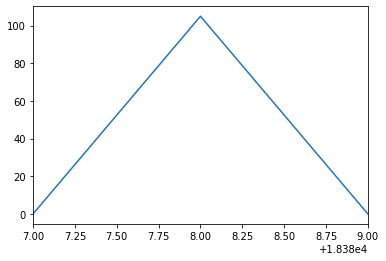

In [70]:
min_df.loc[(min_df['tstp'] >= '2012-12-19 12:30:00') & (min_df['tstp'] <= '2012-12-19 13:00:00'),:].isna().sum(axis=1).plot()

In [71]:
min_df.loc[(min_df['tstp'] >= '2012-12-19 12:30:00') & (min_df['tstp'] <= '2012-12-19 13:00:00'),'tstp']

18387    2012-12-19 12:30:00
18388    2012-12-19 12:37:27
18389    2012-12-19 13:00:00
Name: tstp, dtype: object

In [73]:
indexes = min_df.loc[(min_df['tstp'] > '2012-12-19 12:30:00') & (min_df['tstp'] < '2012-12-19 13:00:00'),:].index
min_df = min_df.drop(indexes)

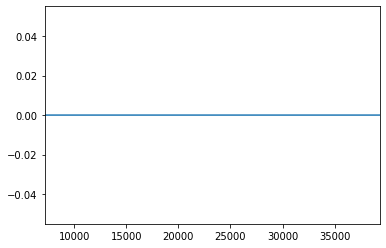

In [80]:
min_df.loc[min_df['tstp'] >= '2012-05-01',:].isna().sum(axis=1).plot() # and deleting the first values

In [82]:
min_df = min_df.loc[min_df['tstp'] >= '2012-05-01',:]

In [85]:
min_df.isna().sum(axis=1).sum() # Not NaNs!

0

In [84]:
min_df.to_csv(os.path.join(folder, 'min_resume_clean.csv'))

## So after deleting values between '2012-12-18 15:00:00' and '2012-12-18 15:30:00', and values between '2012-12-19 12:30:00' and '2012-12-19 13:00:00', and considering all over '2012-05-01' we are ready to go!

Do the same with the others files

In [86]:
for file in ['sum_resume', 'max_resume', 'mean_resume']:
    min_df = pd.read_csv(os.path.join(folder, '{}.csv'.format(file)))
    indexes = min_df.loc[(min_df['tstp'] > '2012-12-18 15:00:00') & (min_df['tstp'] < '2012-12-18 15:30:00'),:].index
    min_df = min_df.drop(indexes)
    indexes = min_df.loc[(min_df['tstp'] > '2012-12-19 12:30:00') & (min_df['tstp'] < '2012-12-19 13:00:00'),:].index
    min_df = min_df.drop(indexes)
    min_df = min_df.loc[min_df['tstp'] >= '2012-05-01',:]
    min_df.to_csv(os.path.join(folder, '{}_clean.csv'.format(file)))
    print(min_df.isna().sum(axis=1).sum())

0
0
0


# Now we can generate the acorns groups and acorn categories


In [53]:
block_group = pd.read_csv(os.path.join('informations_households.csv'))
block_group.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [54]:
flists = {}
for g in block_group['Acorn_grouped'].unique():
    flists[g] = list(block_group.loc[block_group['Acorn_grouped'] == g]['file'].unique())
flists

{'ACORN-': ['block_0'],
 'Affluent': ['block_0',
  'block_1',
  'block_2',
  'block_3',
  'block_4',
  'block_5',
  'block_6',
  'block_7',
  'block_8',
  'block_9',
  'block_10',
  'block_11',
  'block_12',
  'block_13',
  'block_14',
  'block_15',
  'block_16',
  'block_17',
  'block_18',
  'block_19',
  'block_20',
  'block_21',
  'block_22',
  'block_23',
  'block_24',
  'block_25',
  'block_26',
  'block_27',
  'block_28',
  'block_29',
  'block_30',
  'block_31',
  'block_32',
  'block_33',
  'block_34',
  'block_35',
  'block_36',
  'block_37',
  'block_38',
  'block_39',
  'block_40',
  'block_41',
  'block_42',
  'block_43'],
 'Comfortable': ['block_43',
  'block_44',
  'block_45',
  'block_46',
  'block_47',
  'block_48',
  'block_49',
  'block_50',
  'block_51',
  'block_52',
  'block_53',
  'block_54',
  'block_55',
  'block_56',
  'block_57',
  'block_58',
  'block_59',
  'block_60',
  'block_61',
  'block_62',
  'block_63',
  'block_64',
  'block_65',
  'block_66',
  'blo

In [55]:
grupos = {}
for g in block_group['Acorn'].unique():
    grupos[g] = list(block_group.loc[block_group['Acorn'] == g]['file'].unique())
grupos

{'ACORN-': ['block_0'],
 'ACORN-A': ['block_0', 'block_1', 'block_2', 'block_3'],
 'ACORN-B': ['block_3'],
 'ACORN-C': ['block_3', 'block_4', 'block_5', 'block_6'],
 'ACORN-D': ['block_6',
  'block_7',
  'block_8',
  'block_9',
  'block_10',
  'block_11',
  'block_12'],
 'ACORN-E': ['block_12',
  'block_13',
  'block_14',
  'block_15',
  'block_16',
  'block_17',
  'block_18',
  'block_19',
  'block_20',
  'block_21',
  'block_22',
  'block_23',
  'block_24',
  'block_25',
  'block_26',
  'block_27',
  'block_28',
  'block_29',
  'block_30',
  'block_31',
  'block_32',
  'block_33',
  'block_34',
  'block_35',
  'block_36',
  'block_37',
  'block_38',
  'block_39',
  'block_40',
  'block_41',
  'block_42',
  'block_43'],
 'ACORN-F': ['block_43',
  'block_44',
  'block_45',
  'block_46',
  'block_47',
  'block_48',
  'block_49',
  'block_50',
  'block_51',
  'block_52',
  'block_53',
  'block_54',
  'block_55',
  'block_56',
  'block_57'],
 'ACORN-G': ['block_57', 'block_58', 'block_59'

In [56]:
df_sum = pd.read_csv(os.path.join(folder, 'sum_resume_clean.csv'), index_col=0)
df_max = pd.read_csv(os.path.join(folder, 'max_resume_clean.csv'), index_col=0)
df_min = pd.read_csv(os.path.join(folder, 'min_resume_clean.csv'), index_col=0)
df_mean = pd.read_csv(os.path.join(folder, 'mean_resume_clean.csv'), index_col=0)

In [57]:
g_sum = pd.DataFrame([])
g_mean = pd.DataFrame([])
g_min = pd.DataFrame([])
g_max = pd.DataFrame([])
g_sum['tstp'] = df_sum['tstp']
g_mean['tstp'] = df_mean['tstp']
g_min['tstp'] = df_min['tstp']
g_max['tstp'] = df_max['tstp']

In [58]:
ag_sum = pd.DataFrame([])
ag_mean = pd.DataFrame([])
ag_min = pd.DataFrame([])
ag_max = pd.DataFrame([])
ag_sum['tstp'] = df_sum['tstp']
ag_mean['tstp'] = df_mean['tstp']
ag_min['tstp'] = df_min['tstp']
ag_max['tstp'] = df_max['tstp']

In [59]:
g_sum.tail()

,tstp
39287,2014-02-27 22:00:00
39288,2014-02-27 22:30:00
39289,2014-02-27 23:00:00
39290,2014-02-27 23:30:00
39291,2014-02-28 00:00:00


In [60]:
ag_sum.tail()

,tstp
39287,2014-02-27 22:00:00
39288,2014-02-27 22:30:00
39289,2014-02-27 23:00:00
39290,2014-02-27 23:30:00
39291,2014-02-28 00:00:00


In [61]:
for g in flists.keys():    
    g_sum[g] = df_sum.loc[:,flists[g]].sum(axis=1)
    g_mean[g] = df_mean.loc[:,flists[g]].mean(axis=1)
    g_min[g] = df_min.loc[:,flists[g]].mean(axis=1)
    g_max[g] = df_max.loc[:,flists[g]].mean(axis=1)

In [62]:
g_sum.to_csv(os.path.join(folder, 'gsum_resume.csv'))
g_max.to_csv(os.path.join(folder, 'gmax_resume.csv'))
g_min.to_csv(os.path.join(folder, 'gmin_resume.csv'))
g_mean.to_csv(os.path.join(folder, 'gmean_resume.csv'))

In [63]:
for ag in grupos.keys():    
    ag_sum[ag] = df_sum.loc[:,grupos[ag]].sum(axis=1)
    ag_mean[ag] = df_mean.loc[:,grupos[ag]].mean(axis=1)
    ag_min[ag] = df_min.loc[:,grupos[ag]].mean(axis=1)
    ag_max[ag] = df_max.loc[:,grupos[ag]].mean(axis=1)

In [64]:
ag_sum.to_csv(os.path.join(folder, 'agsum_resume.csv'))
ag_max.to_csv(os.path.join(folder, 'agmax_resume.csv'))
ag_min.to_csv(os.path.join(folder, 'agmin_resume.csv'))
ag_mean.to_csv(os.path.join(folder, 'agmean_resume.csv'))